In [ ]:
import requests
import pandas as pd

url = "https://dummyjson.com/products"

data = requests.get(url).json()
df = pd.json_normalize(data['products'])
df.head()

,id,title,description,category,price,discountPercentage,rating,stock,tags,brand,...,minimumOrderQuantity,images,thumbnail,dimensions.width,dimensions.height,dimensions.depth,meta.createdAt,meta.updatedAt,meta.barcode,meta.qrCode
0,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,9.99,7.17,4.94,5,"[beauty, mascara]",Essence,...,24,[https://cdn.dummyjson.com/products/images/bea...,https://cdn.dummyjson.com/products/images/beau...,23.17,14.43,28.01,2024-05-23T08:56:21.618Z,2024-05-23T08:56:21.618Z,9164035109868,https://assets.dummyjson.com/public/qr-code.png
1,2,Eyeshadow Palette with Mirror,The Eyeshadow Palette with Mirror offers a ver...,beauty,19.99,5.50,3.28,44,"[beauty, eyeshadow]",Glamour Beauty,...,32,[https://cdn.dummyjson.com/products/images/bea...,https://cdn.dummyjson.com/products/images/beau...,12.42,8.63,29.13,2024-05-23T08:56:21.618Z,2024-05-23T08:56:21.618Z,2817839095220,https://assets.dummyjson.com/public/qr-code.png
2,3,Powder Canister,The Powder Canister is a finely milled setting...,beauty,14.99,18.14,3.82,59,"[beauty, face powder]",Velvet Touch,...,25,[https://cdn.dummyjson.com/products/images/bea...,https://cdn.dummyjson.com/products/images/beau...,24.16,10.70,11.07,2024-05-23T08:56:21.618Z,2024-05-23T08:56:21.618Z,0516267971277,https://assets.dummyjson.com/public/qr-code.png
3,4,Red Lipstick,The Red Lipstick is a classic and bold choice ...,beauty,12.99,19.03,2.51,68,"[beauty, lipstick]",Chic Cosmetics,...,6,[https://cdn.dummyjson.com/products/images/bea...,https://cdn.dummyjson.com/products/images/beau...,14.37,13.94,14.60,2024-05-23T08:56:21.619Z,2024-05-23T08:56:21.619Z,9444582199406,https://assets.dummyjson.com/public/qr-code.png
4,5,Red Nail Polish,The Red Nail Polish offers a rich and glossy r...,beauty,8.99,2.46,3.91,71,"[beauty, nail polish]",Nail Couture,...,46,[https://cdn.dummyjson.com/products/images/bea...,https://cdn.dummyjson.com/products/images/beau...,8.11,10.89,29.06,2024-05-23T08:56:21.619Z,2024-05-23T08:56:21.619Z,3212847902461,https://assets.dummyjson.com/public/qr-code.png


In [ ]:
col_to_keep = ["id", "title", "description", "category", "tags", "images"]
df2 = df[col_to_keep].copy()

y = []

for i in range(len(data['products'])):
  y.append([])
  for j in range(len(data['products'][i]['reviews'])):
    y[i].append(data['products'][i]['reviews'][j]['comment'])

df2.loc[:, "comment"] = pd.Series(y)

x = []

for i in range(len(data['products'])):
  x.append(data['products'][i]['meta']['qrCode'])

df2.loc[:, "qrCode"] = pd.Series(x)

df2 = df2[["id", "title", "description", "category", "tags", "comment", "qrCode", "images"]]

for i in range(len(df2)):
  df2.loc[i, "tags"] = str(df2.loc[i, "tags"]).replace("[", "").replace("]", "").replace("'", "")
  df2.loc[i, "comment"] = str(df2.loc[i, "comment"]).replace("[", "").replace("]", "").replace("'", "").replace("!", "")
  df2.loc[i, "images"] = str(df2.loc[i, "images"]).replace("[", "").replace("]", "").replace("'", "")

df2.head()

,id,title,description,category,tags,comment,qrCode,images
0,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,"beauty, mascara","Very unhappy with my purchase, Not as describe...",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...
1,2,Eyeshadow Palette with Mirror,The Eyeshadow Palette with Mirror offers a ver...,beauty,"beauty, eyeshadow","Very satisfied, Very disappointed, Highly impr...",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...
2,3,Powder Canister,The Powder Canister is a finely milled setting...,beauty,"beauty, face powder","Very happy with my purchase, Great value for m...",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...
3,4,Red Lipstick,The Red Lipstick is a classic and bold choice ...,beauty,"beauty, lipstick","Great product, Very pleased, Very pleased",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...
4,5,Red Nail Polish,The Red Nail Polish offers a rich and glossy r...,beauty,"beauty, nail polish","Very pleased, Great product, Highly recommended",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...


In [ ]:
# astype() return new DF where dtypes has been changed to specified type

df3 = df2.astype(str).copy()
df3.dtypes

# Pandas uses object dtype to represent strings

,0
id,object
title,object
description,object
category,object
tags,object
comment,object
qrCode,object
images,object


In [ ]:
# Check for duplicated entries

print(df2.duplicated())

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
dtype: bool


In [ ]:
col_to_keep_2 = ["id", "price", "discountPercentage", "rating"]
df4 = df[col_to_keep_2].copy()
df4.head()

,id,price,discountPercentage,rating
0,1,9.99,7.17,4.94
1,2,19.99,5.50,3.28
2,3,14.99,18.14,3.82
3,4,12.99,19.03,2.51
4,5,8.99,2.46,3.91


In [ ]:
# merge() updates the content of two DF by merging them together
# merge() does it based on a shared Col or Row index

merged_df = pd.merge(df2, df4, on = "id", how = "outer")
merged_df.head()

# concat() stacks DF together vertically, or horizontally

,id,title,description,category,tags,comment,qrCode,images,price,discountPercentage,rating
0,1,Essence Mascara Lash Princess,The Essence Mascara Lash Princess is a popular...,beauty,"beauty, mascara","Very unhappy with my purchase, Not as describe...",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...,9.99,7.17,4.94
1,2,Eyeshadow Palette with Mirror,The Eyeshadow Palette with Mirror offers a ver...,beauty,"beauty, eyeshadow","Very satisfied, Very disappointed, Highly impr...",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...,19.99,5.50,3.28
2,3,Powder Canister,The Powder Canister is a finely milled setting...,beauty,"beauty, face powder","Very happy with my purchase, Great value for m...",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...,14.99,18.14,3.82
3,4,Red Lipstick,The Red Lipstick is a classic and bold choice ...,beauty,"beauty, lipstick","Great product, Very pleased, Very pleased",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...,12.99,19.03,2.51
4,5,Red Nail Polish,The Red Nail Polish offers a rich and glossy r...,beauty,"beauty, nail polish","Very pleased, Great product, Highly recommended",https://assets.dummyjson.com/public/qr-code.png,https://cdn.dummyjson.com/products/images/beau...,8.99,2.46,3.91


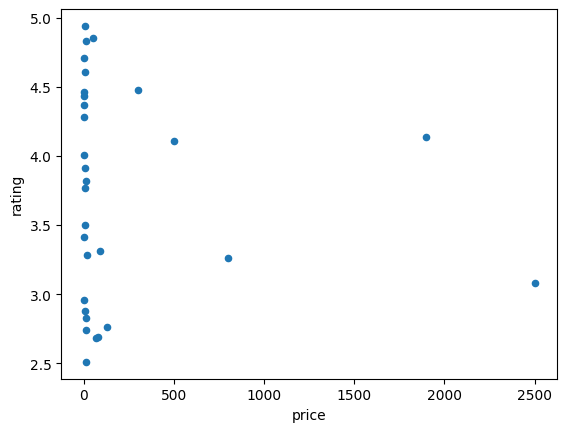

In [ ]:
import matplotlib.pyplot as plt

merged_df.plot(x = 'price', y = 'rating', kind='scatter')
plt.show()